# Dataset
The given dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. We will be using only 7000 of the 20,000 images. The dataset in this assignment is going to be used on the following task:




The 4 columns contain the following information:


* **[age]** is an integer from 0 to 116, indicating the age. You can convert it to float for regression predictions
* **[gender]** is either 0 (male) or 1 (female)
* **[race]** is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
*  The 4th column contains the pixels of the images flattened to a single dimension. Each of the original image is of size 48x48 and the flattened image vector consists of 48x48 = 2304 pixel values.



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Lets use pandas to load our data
df = pd.read_csv("./DL_assignment1_dataset.csv")
df

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...
23700,99,0,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [24]:
random_seed = 42
df_sampled = df.sample(n=7000, random_state=random_seed)
df_sampled.reset_index(drop=True, inplace=True)
df_sampled

,age,ethnicity,gender,pixels
0,49,1,1,31 32 28 27 34 38 37 40 47 51 52 57 72 93 118 ...
1,39,1,0,186 65 38 40 36 51 64 64 60 55 58 60 73 79 82 ...
2,8,4,0,20 23 35 34 45 65 69 72 79 92 106 115 134 148 ...
3,40,4,0,6 6 13 19 15 23 41 76 106 125 133 138 152 158 ...
4,27,0,0,31 31 29 51 98 136 162 175 176 178 178 179 184...
...,...,...,...,...
6995,49,3,0,128 130 131 131 132 134 134 140 72 43 102 77 1...
6996,28,1,1,28 22 19 23 16 22 19 31 64 81 88 96 108 120 13...
6997,32,3,1,221 229 227 200 166 115 146 198 186 184 178 15...
6998,41,0,0,58 61 76 58 83 71 74 90 71 112 77 91 111 135 1...


Let us take a look at an image. 

The 4th column contains all the pixel values in a string for each image. Lets convert all the strings to arrays first.

In [25]:
def string_to_array(pixel_string):
    pixel_list = pixel_string.split()
    pixel_array = np.array([int(value) for value in pixel_list])
    return pixel_array

In [26]:
df_sampled['pixels'] = df_sampled['pixels'].apply(string_to_array)

In [27]:
df_sampled['pixels']

0       [31, 32, 28, 27, 34, 38, 37, 40, 47, 51, 52, 5...
1       [186, 65, 38, 40, 36, 51, 64, 64, 60, 55, 58, ...
2       [20, 23, 35, 34, 45, 65, 69, 72, 79, 92, 106, ...
3       [6, 6, 13, 19, 15, 23, 41, 76, 106, 125, 133, ...
4       [31, 31, 29, 51, 98, 136, 162, 175, 176, 178, ...
                              ...                        
6995    [128, 130, 131, 131, 132, 134, 134, 140, 72, 4...
6996    [28, 22, 19, 23, 16, 22, 19, 31, 64, 81, 88, 9...
6997    [221, 229, 227, 200, 166, 115, 146, 198, 186, ...
6998    [58, 61, 76, 58, 83, 71, 74, 90, 71, 112, 77, ...
6999    [19, 21, 20, 23, 33, 54, 90, 128, 149, 169, 17...
Name: pixels, Length: 7000, dtype: object

 "pixels" column has been converted to arrays which we can now use as input features to our model

Showing the first image of our dataset

Age: 28
Ethnicity: 3
Gender: 0


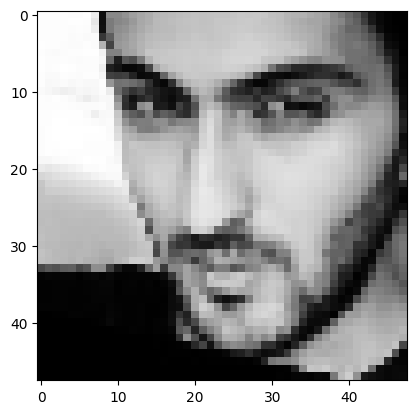

In [28]:
index = 30
first_image = df_sampled['pixels'][index]
image = first_image.reshape((48,48))
print("Age: "+str(df_sampled["age"][index])+"\nEthnicity: "+str(df_sampled["ethnicity"][index])+ "\nGender: "+str(df_sampled["gender"][index]))
plt.imshow(image,cmap="gray")

In [29]:
# imports 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.optim as optim
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
import seaborn as sns
import random
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [30]:
print(df_sampled.shape)

(7000, 4)


In [31]:
# Split the data into train, validation, and test sets
train_data, temp_data = train_test_split(df_sampled, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)
print("train_data: ", str(train_data.shape) + "\nval_data: ", str(val_data.shape) + "\ntest_data: ",str(test_data.shape))


train_data:  (4900, 4)
val_data:  (1050, 4)
test_data:  (1050, 4)


In [32]:
train_data

,age,ethnicity,gender,pixels
1612,32,0,1,"[15, 18, 47, 48, 44, 42, 22, 62, 95, 120, 139,..."
978,3,2,1,"[67, 78, 72, 67, 58, 55, 82, 107, 134, 161, 16..."
3050,1,3,0,"[128, 52, 53, 63, 80, 119, 150, 166, 171, 175,..."
4960,18,4,0,"[5, 5, 4, 5, 8, 3, 3, 6, 6, 6, 6, 6, 7, 12, 19..."
2548,33,3,1,"[43, 48, 48, 43, 23, 1, 3, 2, 15, 37, 54, 64, ..."
...,...,...,...,...
3772,30,0,1,"[53, 54, 54, 50, 157, 218, 223, 225, 229, 229,..."
5191,28,0,1,"[53, 42, 46, 28, 26, 27, 39, 48, 55, 43, 46, 5..."
5226,28,3,1,"[17, 17, 17, 15, 15, 15, 17, 21, 32, 50, 69, 9..."
5390,52,4,0,"[102, 104, 99, 72, 96, 106, 102, 118, 108, 128..."


In [33]:
# Define a custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, transform=None):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        age = self.data.iloc[idx, 0]  # Age
        ethnicity = self.data.iloc[idx, 1]  # Ethnicity
        gender = self.data.iloc[idx, 2]  # Gender
        pixels = self.data.iloc[idx, 3]  # List of integers representing pixels
        sample = {'age': age, 'ethnicity': ethnicity, 'gender': gender, 'pixels': pixels}

        if self.transform:
            sample = self.transform(sample)

        return sample

# Define a custom transformation to convert pixels to tensors
class CustomToTensor(object):
    def __call__(self, sample):
        age, ethnicity, gender, pixels = (
            sample['age'],
            sample['ethnicity'],
            sample['gender'],
            np.array(sample['pixels'], dtype=np.float32) / 255.0,  # Normalize pixel values
        )
        
        return {
            'age': torch.tensor(age, dtype=torch.float32),
            'ethnicity': torch.tensor(ethnicity, dtype=torch.long),
            'gender': torch.tensor(gender, dtype=torch.long),
            'pixels': torch.tensor(pixels, dtype=torch.float32),
        }

# Create custom datasets for train, validation, and test
train_dataset = CustomDataset(train_data, transform=transforms.Compose([CustomToTensor()]))
val_dataset = CustomDataset(val_data, transform=transforms.Compose([CustomToTensor()]))
test_dataset = CustomDataset(test_data, transform=transforms.Compose([CustomToTensor()]))

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [34]:
train_loader.dataset[0]

{'age': tensor(32.),
 'ethnicity': tensor(0),
 'gender': tensor(1),
 'pixels': tensor([0.0588, 0.0706, 0.1843,  ..., 0.0549, 0.0510, 0.0431])}

In [35]:
# Check the first batch from the train_loader
for batch in train_loader:
    age_batch = batch['age']
    ethnicity_batch = batch['ethnicity']
    gender_batch = batch['gender']
    pixels_batch = batch['pixels']

    # Check the shapes and data types
    print(f"Age batch shape: {age_batch.shape}, dtype: {age_batch.dtype}")
    print(f"Ethnicity batch shape: {ethnicity_batch.shape}, dtype: {ethnicity_batch.dtype}")
    print(f"Gender batch shape: {gender_batch.shape}, dtype: {gender_batch.dtype}")
    print(f"Pixels batch shape: {pixels_batch.shape}, dtype: {pixels_batch.dtype}")

    # Check the first sample in the batch
    print(f"Age (first sample): {age_batch[0]}")
    print(f"Ethnicity (first sample): {ethnicity_batch[0]}")
    print(f"Gender (first sample): {gender_batch[0]}")
    print(f"Pixels (first sample): {pixels_batch[0]}")

    break  # Break after checking the first batch


Age batch shape: torch.Size([64]), dtype: torch.float32
Ethnicity batch shape: torch.Size([64]), dtype: torch.int64
Gender batch shape: torch.Size([64]), dtype: torch.int64
Pixels batch shape: torch.Size([64, 2304]), dtype: torch.float32
Age (first sample): 23.0
Ethnicity (first sample): 1
Gender (first sample): 1
Pixels (first sample): tensor([0.2824, 0.4196, 0.5725,  ..., 0.9490, 0.9529, 0.9529])


In [36]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print ('<== CUDA availability : ==>', use_cuda)

<== CUDA availability : ==> True


In [61]:
class MultiTaskModel(nn.Module):
    def __init__(self):
        super(MultiTaskModel, self).__init__()
        # Feature extractor layers
        self.feature_extractor = nn.Sequential(
            nn.Linear(2304, 1024),  # Input size: 48*48=2304
        )
        
        # Output heads for age prediction, ethnicity classification, and gender classification
        self.age_head = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
             nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)  # Age prediction is a regression task
        )
        
        self.ethnicity_head = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 5)  # 5 classes for ethnicity classification
        )
        
        self.gender_head = nn.Sequential(
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # 2 classes for gender classification (binary)
        )

    def forward(self, x):
        # Feature extraction
        features = self.feature_extractor(x)
        
        # Task-specific predictions
        age_pred = self.age_head(features)
        ethnicity_pred = self.ethnicity_head(features)
        gender_pred = self.gender_head(features)
        
        return age_pred, ethnicity_pred, gender_pred

# Create an instance of the MultiTaskModel
model = MultiTaskModel()
# Move the model to the GPU if CUDA is available
model.to(device)


MultiTaskModel(
  (feature_extractor): Sequential(
    (0): Linear(in_features=2304, out_features=1024, bias=True)
  )
  (age_head): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
  (ethnicity_head): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=5, bias=True)
  )
  (gender_head): Sequential(
    (0): Linear(in_features=1024, out_featur

In [62]:
# Define loss functions for each task
age_criterion = nn.MSELoss()  # Mean Squared Error for age prediction
ethnicity_criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for ethnicity classification
gender_criterion = nn.CrossEntropyLoss()  # Cross-Entropy Loss for gender classification

# Function to train the model for one epoch
def train_epoch(model, train_loader, optimizer, device):
    model.train()
    total_loss_age = 0.0
    total_loss_ethnicity = 0.0
    total_loss_gender = 0.0
    correct_ethnicity_predictions = 0
    correct_gender_predictions = 0
    total_samples = 0
    
    for batch in train_loader:
        # Move batch to the GPU if available
        age_target = batch['age'].to(device)
        ethnicity_target = batch['ethnicity'].to(device)
        gender_target = batch['gender'].to(device)
        pixels = batch['pixels'].to(device)
        
        # Forward pass
        age_pred, ethnicity_pred, gender_pred = model(pixels)
        
        # Calculate losses for each task
        loss_age = age_criterion(age_pred.view(-1), age_target)
        loss_ethnicity = ethnicity_criterion(ethnicity_pred, ethnicity_target)
        loss_gender = gender_criterion(gender_pred, gender_target)
        
        # Total loss is the sum of losses from all tasks
        total_loss = 0.001*loss_age + loss_ethnicity + loss_gender
        
        # Backpropagation and optimization
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        
        # Accumulate losses
        total_loss_age += loss_age.item()
        total_loss_ethnicity += loss_ethnicity.item()
        total_loss_gender += loss_gender.item()

        # Calculate accuracy for ethnicity and gender predictions
        _, ethnicity_preds = torch.max(ethnicity_pred, 1)
        _, gender_preds = torch.max(gender_pred, 1)
        
        correct_ethnicity_predictions += (ethnicity_preds == ethnicity_target).sum().item()
        correct_gender_predictions += (gender_preds == gender_target).sum().item()

        total_samples += age_target.size(0)

    # Calculate average losses for the epoch
    avg_loss_age = total_loss_age / len(train_loader)
    avg_loss_ethnicity = total_loss_ethnicity / len(train_loader)
    avg_loss_gender = total_loss_gender / len(train_loader)

     # Calculate accuracy for ethnicity and gender predictions
    accuracy_ethnicity = correct_ethnicity_predictions / total_samples
    accuracy_gender = correct_gender_predictions / total_samples

    return avg_loss_age, avg_loss_ethnicity, avg_loss_gender, accuracy_ethnicity, accuracy_gender


In [63]:
len(train_loader.dataset)

4900

In [64]:
# Function to evaluate the model on a dataset
def evaluate(model, data_loader, device):
    model.eval()
    with torch.no_grad():
        # Initialize variables to keep track of validation/test metrics
        total_loss_age = 0.0
        total_loss_ethnicity = 0.0
        total_loss_gender = 0.0
        correct_ethnicity_predictions = 0
        correct_gender_predictions = 0
        total_samples = 0
        
        for batch in data_loader:
            age_target = batch['age'].to(device)
            ethnicity_target = batch['ethnicity'].to(device)
            gender_target = batch['gender'].to(device)
            pixels = batch['pixels'].to(device)
            
            age_pred, ethnicity_pred, gender_pred = model(pixels)
            
            loss_age = age_criterion(age_pred.view(-1), age_target)
            loss_ethnicity = ethnicity_criterion(ethnicity_pred, ethnicity_target)
            loss_gender = gender_criterion(gender_pred, gender_target)
            
            total_loss_age += loss_age.item()
            total_loss_ethnicity += loss_ethnicity.item()
            total_loss_gender += loss_gender.item()
            
            # Calculate accuracy for ethnicity and gender predictions
            _, ethnicity_preds = torch.max(ethnicity_pred, 1)
            _, gender_preds = torch.max(gender_pred, 1)
            
            correct_ethnicity_predictions += (ethnicity_preds == ethnicity_target).sum().item()
            correct_gender_predictions += (gender_preds == gender_target).sum().item()
            
            total_samples += age_target.size(0)

        # Calculate average losses
        avg_loss_age = total_loss_age / len(data_loader)
        avg_loss_ethnicity = total_loss_ethnicity /  len(data_loader)
        avg_loss_gender = total_loss_gender /  len(data_loader)

        # Calculate accuracy for ethnicity and gender predictions
        accuracy_ethnicity = correct_ethnicity_predictions / total_samples
        accuracy_gender = correct_gender_predictions / total_samples

    return avg_loss_age, avg_loss_ethnicity, avg_loss_gender, accuracy_ethnicity, accuracy_gender


In [65]:
train_dataset.data['ethnicity']

1612    0
978     2
3050    3
4960    4
2548    3
       ..
3772    0
5191    0
5226    3
5390    4
860     0
Name: ethnicity, Length: 4900, dtype: int64

In [66]:
# Compute class weights based on training data
class_weights_ethnicity = compute_class_weight('balanced', classes=np.unique(df_sampled['ethnicity']), y=df_sampled['ethnicity'])

# Convert class weights to PyTorch tensor
class_weights_ethnicity = torch.tensor(class_weights_ethnicity, dtype=torch.float32).to(device)

train_losses_age =[]
train_losses_gender = []
train_losses_ethnicity = []
val_losses_age = []
val_losses_gender = []
val_losses_ethnicity = []
train_accuracies_gender = []
train_accuracies_ethnicity = []
val_accuracies_gender = []
val_accuracies_ethnicity = []


# Use class weights in your loss function
ethnicity_criterion = nn.CrossEntropyLoss(weight=class_weights_ethnicity)
# Training loop
def train(model, train_loader, val_loader, optimizer, device, num_epochs):
    for epoch in range(num_epochs):
        # Train for one epoch
        avg_loss_age, avg_loss_ethnicity, avg_loss_gender, train_accuracy_ethnicity, train_accuracy_gender = train_epoch(model, train_loader, optimizer, device)
        train_losses_age.append(avg_loss_age)
        train_losses_gender.append(avg_loss_gender)
        train_losses_ethnicity.append(avg_loss_ethnicity)
        train_accuracies_ethnicity.append(train_accuracy_ethnicity)
        train_accuracies_gender.append(train_accuracy_gender)
        

        # Print training statistics for the epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Losses:')
        print(f'Age Loss: {avg_loss_age:.4f}')
        print(f'Ethnicity Loss: {avg_loss_ethnicity:.4f}')
        print(f'Gender Loss: {avg_loss_gender:.4f}')
        print(f'Accuracy - Ethnicity: {train_accuracy_ethnicity:.4f}, Gender: {train_accuracy_gender:.4f}')
        print('-' * 50)  # Add a separator line between epochs

        # Evaluate on the validation set
        val_loss_age, val_loss_ethnicity, val_loss_gender, val_accuracy_ethnicity, val_accuracy_gender = evaluate(model, val_loader, device)

        val_losses_age.append(val_loss_age)
        val_losses_gender.append(val_loss_gender)
        val_losses_ethnicity.append(val_loss_ethnicity)
        val_accuracies_ethnicity.append(val_accuracy_ethnicity)
        val_accuracies_gender.append(val_accuracy_gender)

        print(f'Epoch [{epoch + 1}/{num_epochs}] - Validation Losses:')
        print(f'Age Loss: {val_loss_age:.4f}')
        print(f'Ethnicity Loss: {val_loss_ethnicity:.4f}')
        print(f'Gender Loss: {val_loss_gender:.4f}')
        print(f'Accuracy - Ethnicity: {val_accuracy_ethnicity:.4f}, Gender: {val_accuracy_gender:.4f}')

        print('=' * 50)  # Add a separator line between epochs
optimizer = optim.Adam(model.parameters(), lr=0.0001)
train(model, train_loader, val_loader, optimizer, device, num_epochs=80)



Epoch [1/80] - Training Losses:
Age Loss: 938.9175
Ethnicity Loss: 1.6114
Gender Loss: 0.6489
Accuracy - Ethnicity: 0.2139, Gender: 0.6335
--------------------------------------------------
Epoch [1/80] - Validation Losses:
Age Loss: 442.3908
Ethnicity Loss: 1.6024
Gender Loss: 0.5941
Accuracy - Ethnicity: 0.3905, Gender: 0.6876
Epoch [2/80] - Training Losses:
Age Loss: 488.7202
Ethnicity Loss: 1.5985
Gender Loss: 0.5930
Accuracy - Ethnicity: 0.2576, Gender: 0.6818
--------------------------------------------------
Epoch [2/80] - Validation Losses:
Age Loss: 433.5984
Ethnicity Loss: 1.5838
Gender Loss: 0.5565
Accuracy - Ethnicity: 0.1562, Gender: 0.7410
Epoch [3/80] - Training Losses:
Age Loss: 473.2612
Ethnicity Loss: 1.5770
Gender Loss: 0.5649
Accuracy - Ethnicity: 0.2910, Gender: 0.7124
--------------------------------------------------
Epoch [3/80] - Validation Losses:
Age Loss: 420.7607
Ethnicity Loss: 1.5532
Gender Loss: 0.5229
Accuracy - Ethnicity: 0.2600, Gender: 0.7524
Epoch [

In [67]:
# Set a random seed for reproducibility
random.seed(42)

# Define the number of random samples to compare
num_samples_to_compare = 15

# Get a random set of indices from the test dataset
sample_indices = random.sample(range(len(test_dataset)), num_samples_to_compare)

# Create a data loader for the test dataset
sample_loader = DataLoader(test_dataset, batch_size=num_samples_to_compare, sampler=SubsetRandomSampler(sample_indices))

# Evaluate the model on the random samples
model.eval()
with torch.no_grad():
    for batch in sample_loader:
        age_target = batch['age'].to(device)
        ethnicity_target = batch['ethnicity'].to(device)
        gender_target = batch['gender'].to(device)
        pixels = batch['pixels'].to(device)

        age_pred, ethnicity_pred, gender_pred = model(pixels)

        # Convert predictions and targets to CPU for printing
        age_pred = age_pred.cpu().numpy()
        ethnicity_pred = ethnicity_pred.cpu().numpy()
        gender_pred = gender_pred.cpu().numpy()

        age_target = age_target.cpu().numpy()
        ethnicity_target = ethnicity_target.cpu().numpy()
        gender_target = gender_target.cpu().numpy()

        for i in range(num_samples_to_compare):
            print(f"Sample {i + 1}:")
            print(f"Predicted Age: {age_pred[i][0]:.2f}, Actual Age: {age_target[i]:.2f}")
            print(f"Predicted Ethnicity: {ethnicity_pred[i].argmax()}, Actual Ethnicity: {ethnicity_target[i]}")
            print(f"Predicted Gender: {'Male' if gender_pred[i].argmax() == 1 else 'Female'}, Actual Gender: {'Male' if gender_target[i] == 1 else 'Female'}")
            print()


Sample 1:
Predicted Age: 76.87, Actual Age: 83.00
Predicted Ethnicity: 0, Actual Ethnicity: 0
Predicted Gender: Male, Actual Gender: Male

Sample 2:
Predicted Age: 2.13, Actual Age: 1.00
Predicted Ethnicity: 0, Actual Ethnicity: 2
Predicted Gender: Female, Actual Gender: Male

Sample 3:
Predicted Age: 59.24, Actual Age: 35.00
Predicted Ethnicity: 0, Actual Ethnicity: 0
Predicted Gender: Male, Actual Gender: Female

Sample 4:
Predicted Age: 24.19, Actual Age: 40.00
Predicted Ethnicity: 3, Actual Ethnicity: 3
Predicted Gender: Male, Actual Gender: Male

Sample 5:
Predicted Age: 47.50, Actual Age: 36.00
Predicted Ethnicity: 0, Actual Ethnicity: 0
Predicted Gender: Male, Actual Gender: Female

Sample 6:
Predicted Age: 37.17, Actual Age: 35.00
Predicted Ethnicity: 1, Actual Ethnicity: 1
Predicted Gender: Female, Actual Gender: Female

Sample 7:
Predicted Age: 1.95, Actual Age: 1.00
Predicted Ethnicity: 3, Actual Ethnicity: 0
Predicted Gender: Female, Actual Gender: Female

Sample 8:
Predict

Text(0.5, 1.0, 'Confusion Matrix (Gender)')

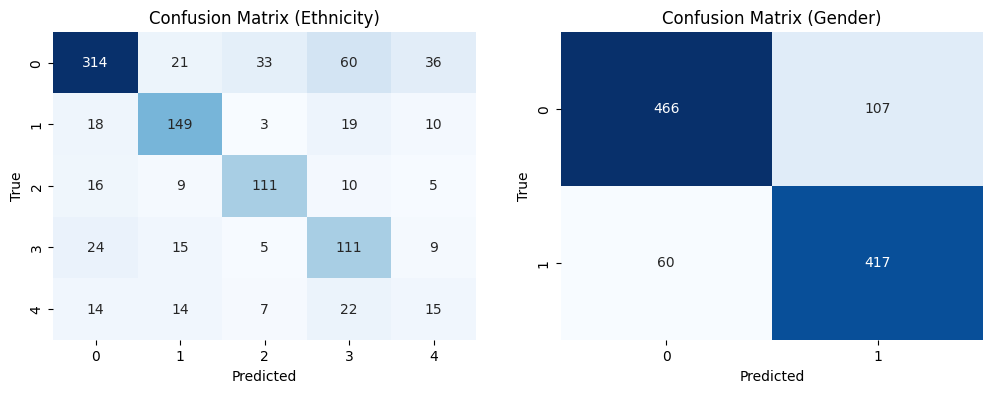

In [68]:

# Initialize empty lists to store true and predicted labels for ethnicity and gender
true_ethnicity_labels = []
predicted_ethnicity_labels = []
true_gender_labels = []
predicted_gender_labels = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        age_target = batch['age'].to(device)
        ethnicity_target = batch['ethnicity'].to(device)
        gender_target = batch['gender'].to(device)
        pixels = batch['pixels'].to(device)

        age_pred, ethnicity_pred, gender_pred = model(pixels)

        # Convert predictions and targets to CPU for scikit-learn
        age_target = age_target.cpu().numpy()
        ethnicity_target = ethnicity_target.cpu().numpy()
        gender_target = gender_target.cpu().numpy()

        ethnicity_pred = ethnicity_pred.argmax(dim=1).cpu().numpy()
        gender_pred = gender_pred.argmax(dim=1).cpu().numpy()

        # Append true and predicted labels for ethnicity and gender
        true_ethnicity_labels.extend(ethnicity_target)
        predicted_ethnicity_labels.extend(ethnicity_pred)
        true_gender_labels.extend(gender_target)
        predicted_gender_labels.extend(gender_pred)

# Create confusion matrices for ethnicity and gender
ethnicity_confusion_matrix = confusion_matrix(true_ethnicity_labels, predicted_ethnicity_labels)
gender_confusion_matrix = confusion_matrix(true_gender_labels, predicted_gender_labels)



plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(ethnicity_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Ethnicity)")

plt.subplot(1, 2, 2)
sns.heatmap(gender_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Gender)")
# print("Confusion Matrix for Ethnicity:")
# print(ethnicity_confusion_matrix)
# print("\nConfusion Matrix for Gender:")
# print(gender_confusion_matrix)


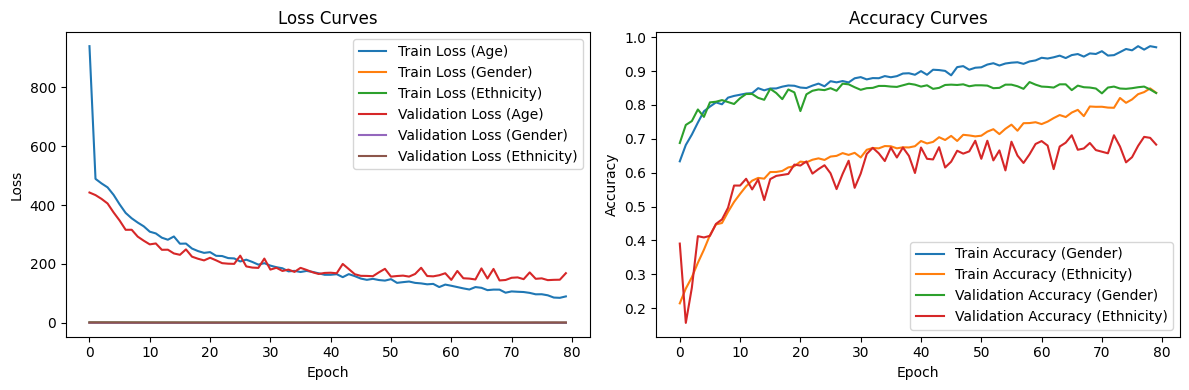

In [69]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses_age, label="Train Loss (Age)")
plt.plot(train_losses_gender, label="Train Loss (Gender)")
plt.plot(train_losses_ethnicity, label="Train Loss (Ethnicity)")
plt.plot(val_losses_age, label="Validation Loss (Age)")
plt.plot(val_losses_gender, label="Validation Loss (Gender)")
plt.plot(val_losses_ethnicity, label="Validation Loss (Ethnicity)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")

plt.subplot(1, 2, 2)
plt.plot(train_accuracies_gender, label="Train Accuracy (Gender)")
plt.plot(train_accuracies_ethnicity, label="Train Accuracy (Ethnicity)")
plt.plot(val_accuracies_gender, label="Validation Accuracy (Gender)")
plt.plot(val_accuracies_ethnicity, label="Validation Accuracy (Ethnicity)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curves")

plt.tight_layout()
plt.show()


In [70]:
# Testing the model on the test dataset
test_loss_age, test_loss_gender, test_loss_ethnicity,test_accuracy_ethnicity, test_accuracy_gender  = evaluate(model, test_loader, device)
print(f"Test Loss (Age): {test_loss_age:.4f}")
print(f"Test Loss (Gender): {test_loss_gender:.4f}")
print(f"Test Loss (Ethnicity): {test_loss_ethnicity:.4f}")
print(f"Test Accuracy (Gender): {100*test_accuracy_gender:.4f}%")
print(f"Test Accuracy (Ethnicity): {100*test_accuracy_ethnicity:.4f}%")


Test Loss (Age): 188.6935
Test Loss (Gender): 1.4863
Test Loss (Ethnicity): 0.5801
Test Accuracy (Gender): 84.0952%
Test Accuracy (Ethnicity): 66.6667%
